# Analyzing NYC Ferry Data

During the covid-19 pandemic lockdowns one could assume public transportation use would drop. The NYC Ferry system has multiple routes that connect different boarding areas. Our goal for this project will be to analyze data from the NYC Ferry system to get a better understanding of the ferry ridership numbers and how they changed wehn the Covid-19 pandemic began.  

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('NYC_Ferry_Ridership.csv')

In [5]:
df.head()

,Date,Hour,Route,Direction,Stop,Boardings,TypeDay
0,07/01/2021,5,RW,NB,Rockaway,20.0,Weekday
1,07/01/2021,5,RW,NB,Sunset Park/BAT,3.0,Weekday
2,07/01/2021,5,SV,SB,East 34th Street,1.0,Weekday
3,07/01/2021,5,SV,SB,East 90th St,0.0,Weekday
4,07/01/2021,5,SV,SB,Soundview,32.0,Weekday


We first have to change the format of the date column.

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [62]:
route_names = {
    'ER': 'East River',
    'RW': 'Rockaway',
    'SB': 'South Brooklyn',
    'AS' : 'Astoria',
    'SV' : 'Soundview',
    'SG' : 'St. George',
    'GI' : 'Govenors Island'


}

First we will plot the overall ridership numbers of the whole ferry system.



In [48]:
ridership_total = df[['Date','Boardings']].groupby('Date').sum()


<AxesSubplot:xlabel='Date'>

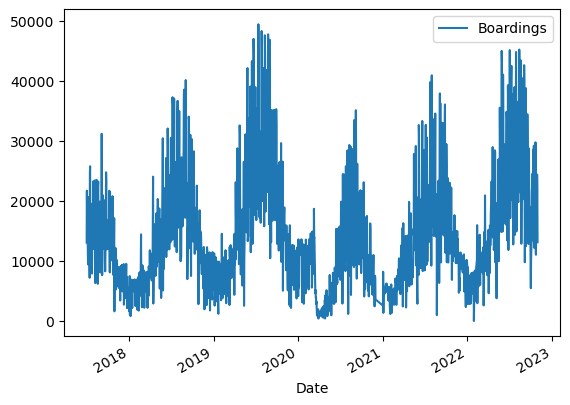

In [49]:
ridership_total.plot()

We will resample the boarding data to look at the weekly ridership numbers instead of the daily ridership numbers.

In [50]:
ridership_total.head()

,Boardings
Date,
2017-07-01,13086.0
2017-07-02,21709.0
2017-07-03,16934.0
2017-07-04,13260.0
2017-07-05,13222.0


In [75]:
ridership_total_w = ridership_total.resample('m').sum()

<AxesSubplot:xlabel='Date'>

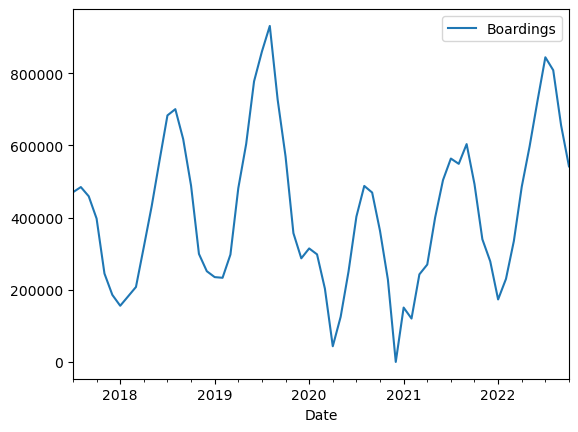

In [76]:
ridership_total_w.plot()

We see a drop in ridership during the first quarter of 2020, as we would expect, since when the covid 19 pandemic lockdowns began.

We now want to see the ridership numbers for each route.

In [73]:
route_names = {
    'ER': 'East River',
    'RW': 'Rockaway',
    'SB': 'South Brooklyn',
    'AS' : 'Astoria',
    'SV' : 'Soundview',
    'SG' : 'St. George',
    'GI' : 'Govenors Island',
    'LE' : 'LE',
    'RR' : 'RR'


}

In [71]:
df['Route'].unique()

array(['RW', 'SV', 'AS', 'ER', 'SB', 'GI', 'SG', 'LE', 'RR'], dtype=object)

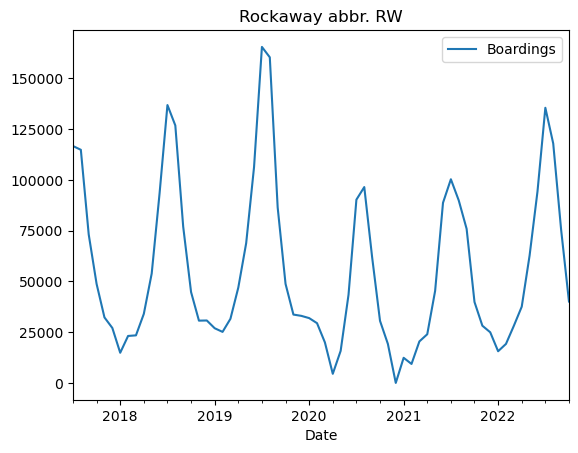

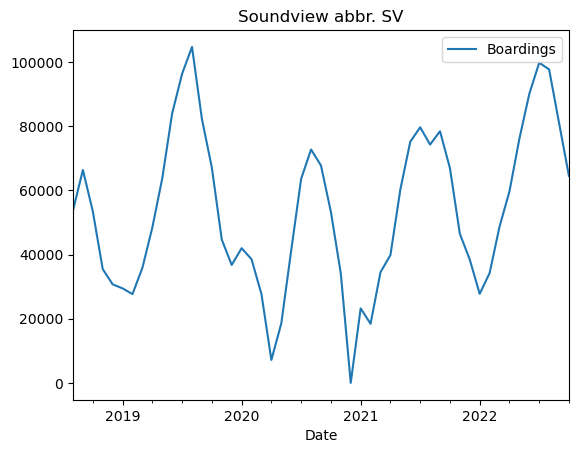

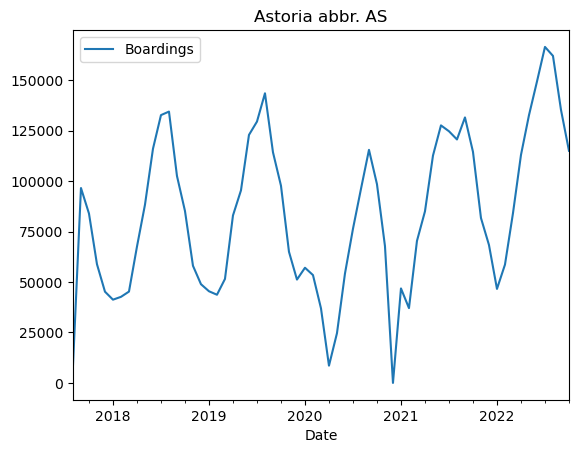

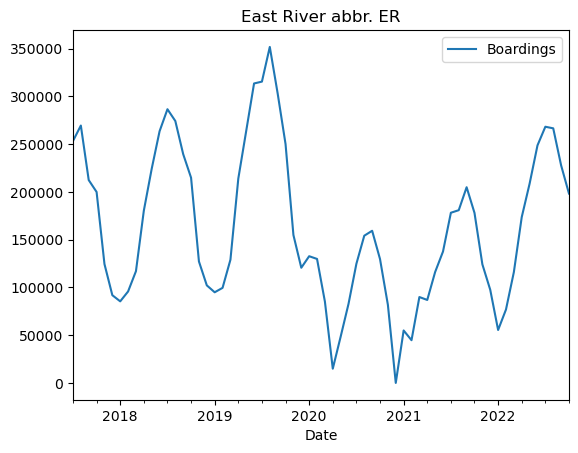

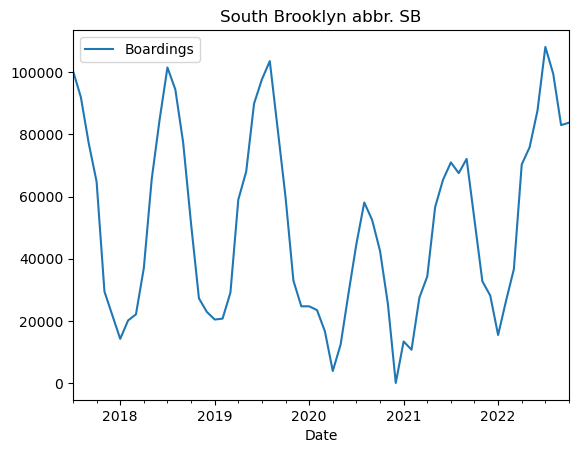

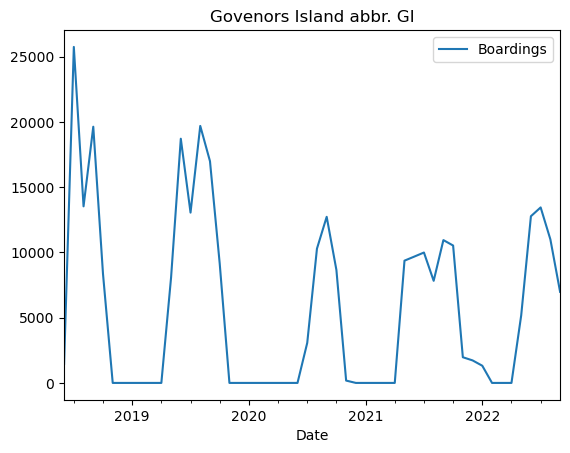

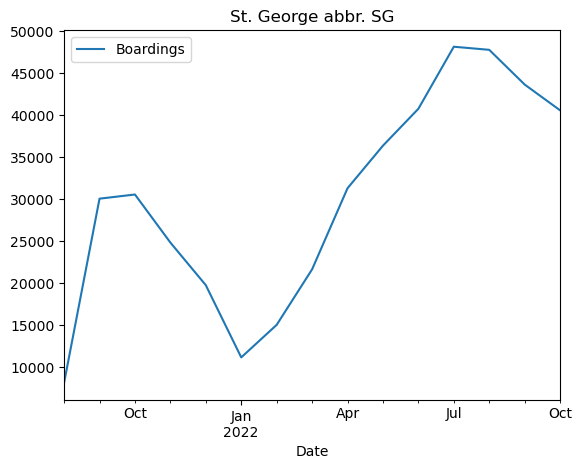

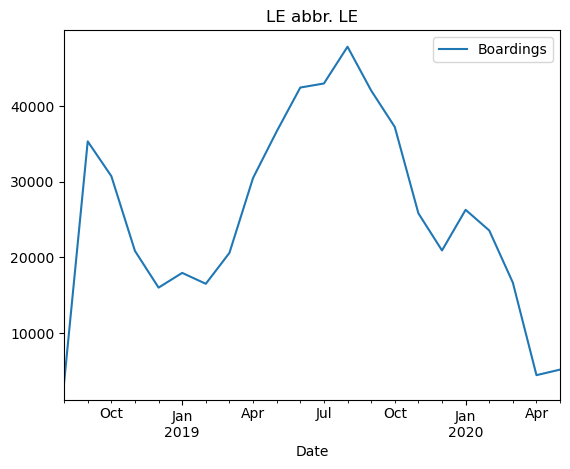

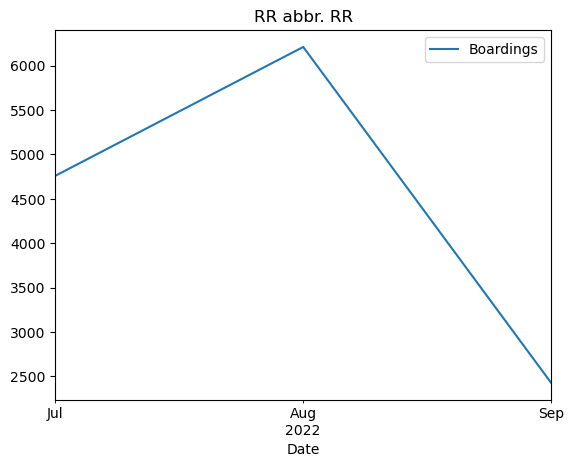

In [74]:
routes = df['Route'].unique()
for r in routes:
    A = df[df['Route'] == r]
    B = A[['Date','Boardings']].groupby('Date').sum()
    C = B.resample('m').sum()
    C.plot(title = route_names[r] + ' abbr. ' + r)

We see that from these visualizations that not every route in our dataset were runnig when the coid 19 lockdowns happened. We want to see how ridership changed when covid lock downs happened, so we will remove routes that weren;r running and routes that only run seasonally. 

In [85]:
routes2 =[ r for r in routes if r not in  ['RR','LE','SG','GI' ]]

In [86]:
routes2

['RW', 'SV', 'AS', 'ER', 'SB']

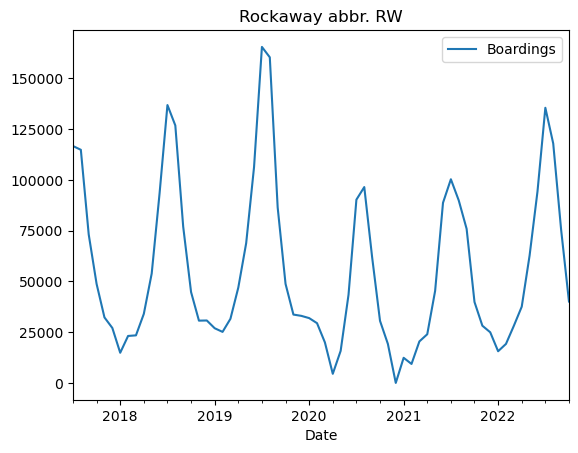

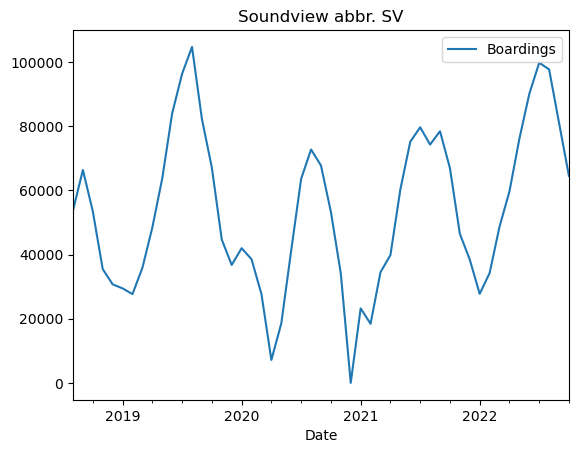

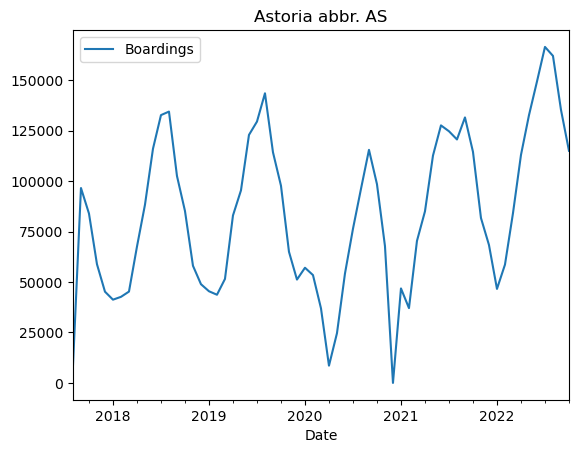

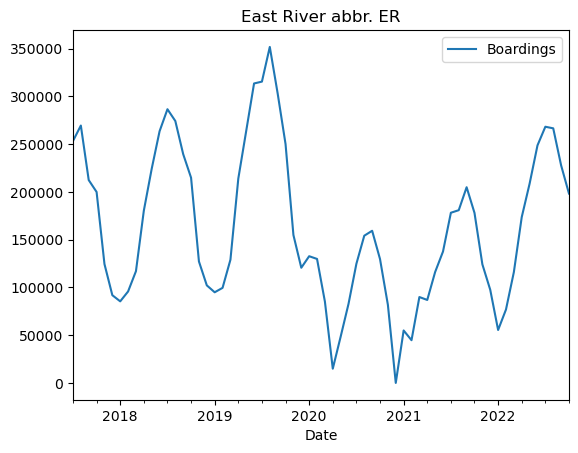

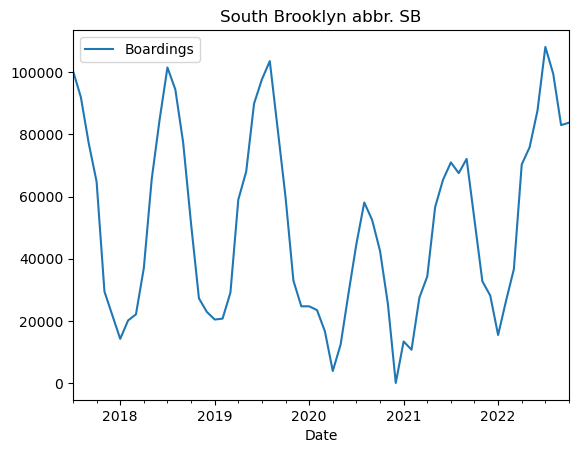

In [87]:
for r in routes2:
    A = df[df['Route'] == r]
    B = A[['Date','Boardings']].groupby('Date').sum()
    C = B.resample('m').sum()
    C.plot(title = route_names[r] + ' abbr. ' + r)

We see during each route a dip in ridership at the end of the first quarter of 2020.

We now want to look at overall ridership numbers again. We will only look at the four routes that started back in 2018.

In [93]:
routes3 =[ r for r in routes if r not in  ['RR','LE','SG','GI','SV']]

df2 = df[df['Route'].isin(routes3)]
total_3_routes = df2[['Date','Boardings']].groupby('Date').sum()

<AxesSubplot:xlabel='Date'>

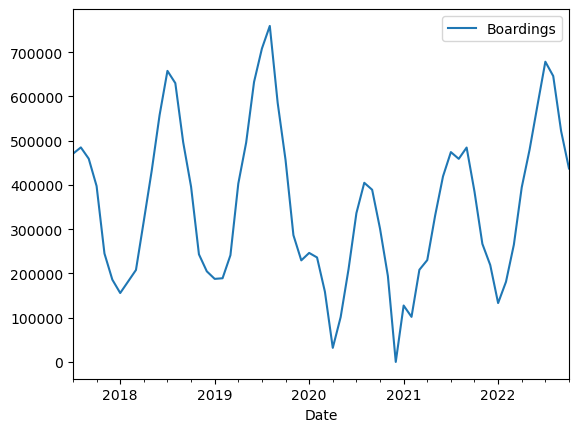

In [96]:
total_3_routes.resample('M').sum().plot()